# Project no 3


# Prediction using Decision Tree Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target
y = pd.DataFrame(y,columns=["Target"])

In [3]:
### Concatenating the data with the target variable
df = pd.concat([data,y],axis=1)

### Displaying the first five rows of the dataset.

In [4]:
df.head() # First 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Displaying the last five rows of the dataset.

In [5]:
df.tail() # Last 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [6]:
df.shape # (Rows,Colunns)

(150, 5)

In [7]:
df.columns # Column Names in the Dataset

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

### Displaying the information of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
df.dtypes # Data types of the Attribute

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Target                 int32
dtype: object

### Checking for Null Values in the Dataset

In [10]:
df.isnull().sum() # No missing values in the dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

### Displaying the Basic Statistics of the Dataset

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Data Visualization

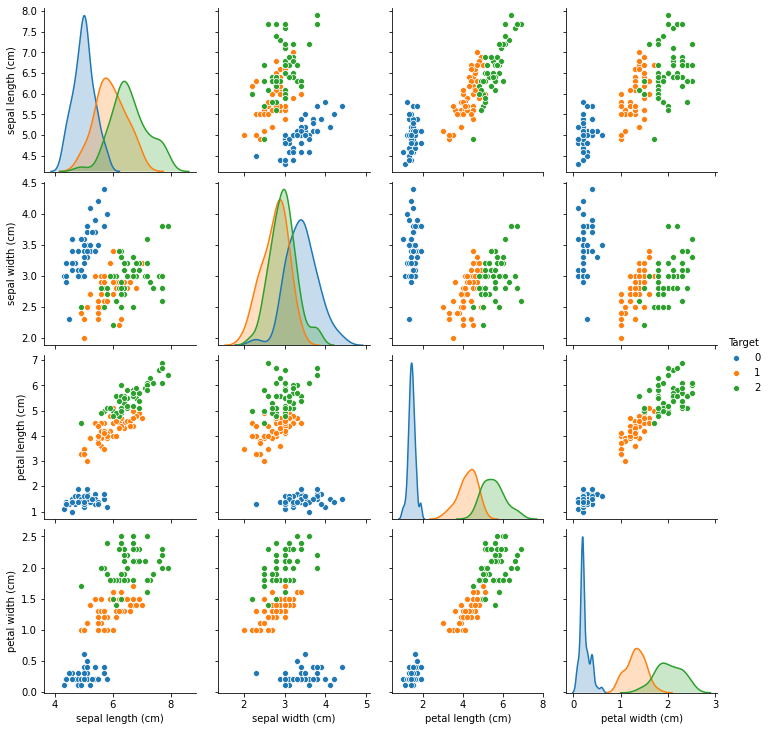

In [12]:
sns.pairplot(df,hue="Target")

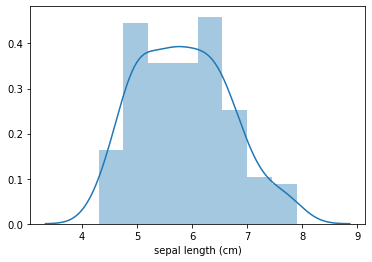

In [13]:
sns.distplot(df["sepal length (cm)"])

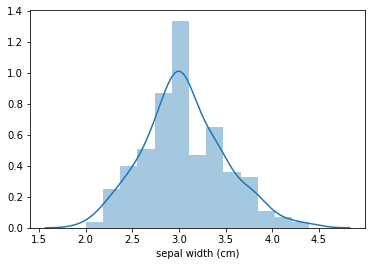

In [14]:
sns.distplot(df["sepal width (cm)"])

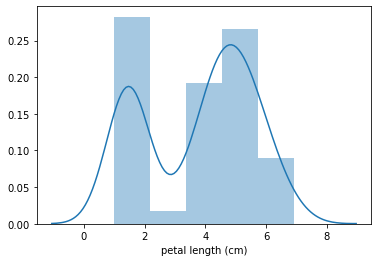

In [15]:
sns.distplot(df["petal length (cm)"])

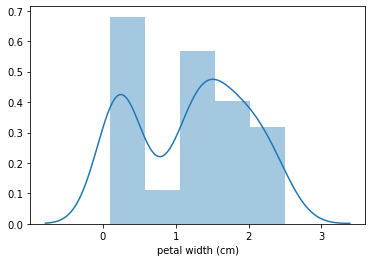

In [16]:
sns.distplot(df["petal width (cm)"])

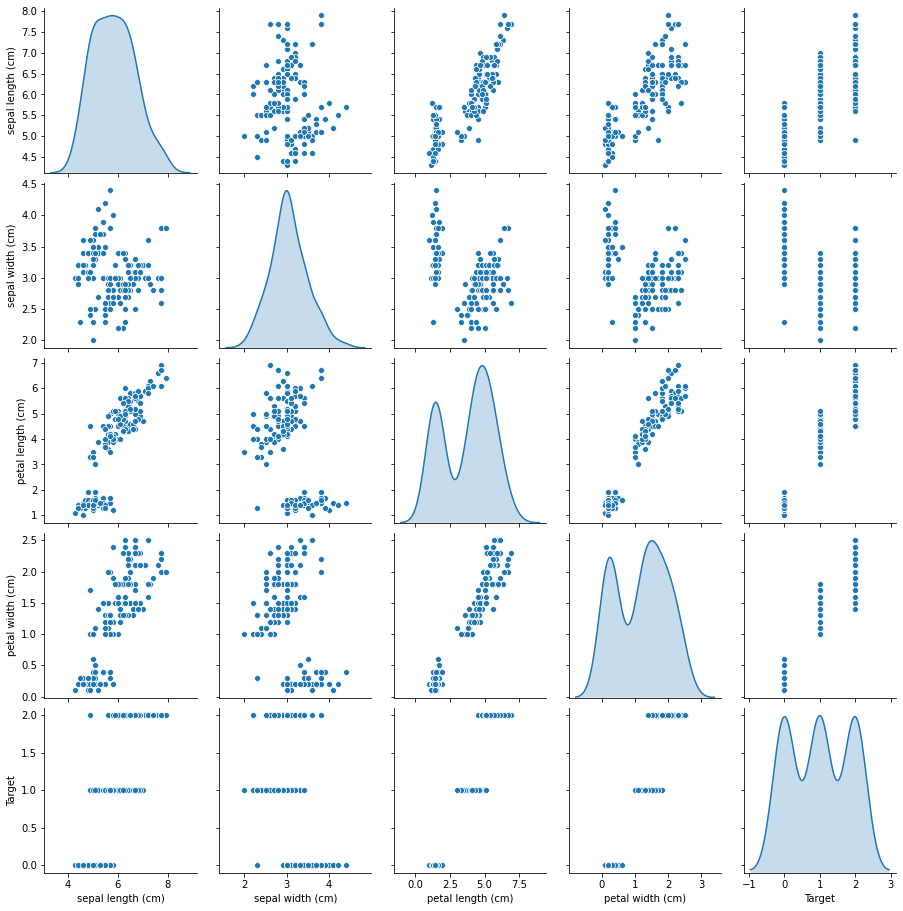

In [17]:
sns.pairplot(df,diag_kind='kde')

<Figure size 720x576 with 0 Axes>

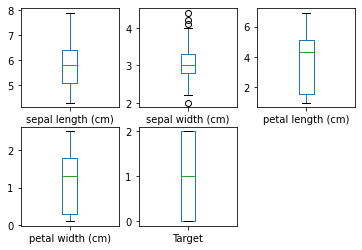

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=[10,8])
df.plot(kind="box",subplots=True,sharey=False,sharex=False,layout=(2,3))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

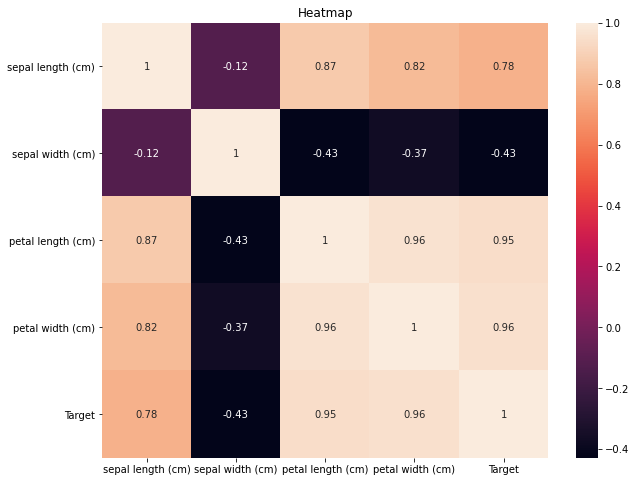

In [19]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True) # To check correlation.
plt.title("Heatmap")
plt.show()

### Splitting data in x and y (Attributes and Labels Respectively)

In [20]:
x = df.drop("Target",axis=1)
y = df.Target

### Performing a Train-Test Split (Splitting the data into training and testing sets)

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=123,test_size=0.2)

Initializing the Decision Tree Model and Fitting the Data

In [22]:
dt=DecisionTreeClassifier(random_state=123)
dt_fit = dt.fit(xtrain,ytrain)

Prediction of the Decision Tree Model

In [23]:
dt_predict = dt_fit.predict(xtest)

Evaluation of the ML Model

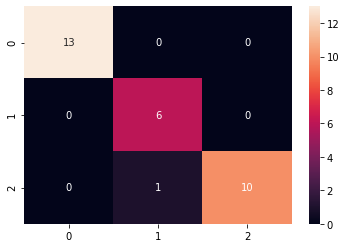

In [24]:
sns.heatmap(confusion_matrix(ytest,dt_predict),annot=True)

In [25]:
classificationreport = classification_report(ytest,dt_predict)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
accuracy = accuracy_score(ytest,dt_predict)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.9666666666666667


In [27]:
# Visualize the graph
export_graphviz(dt_fit,out_file='tree.dot',feature_names=iris.feature_names, filled=True, rounded=True,special_characters=True)



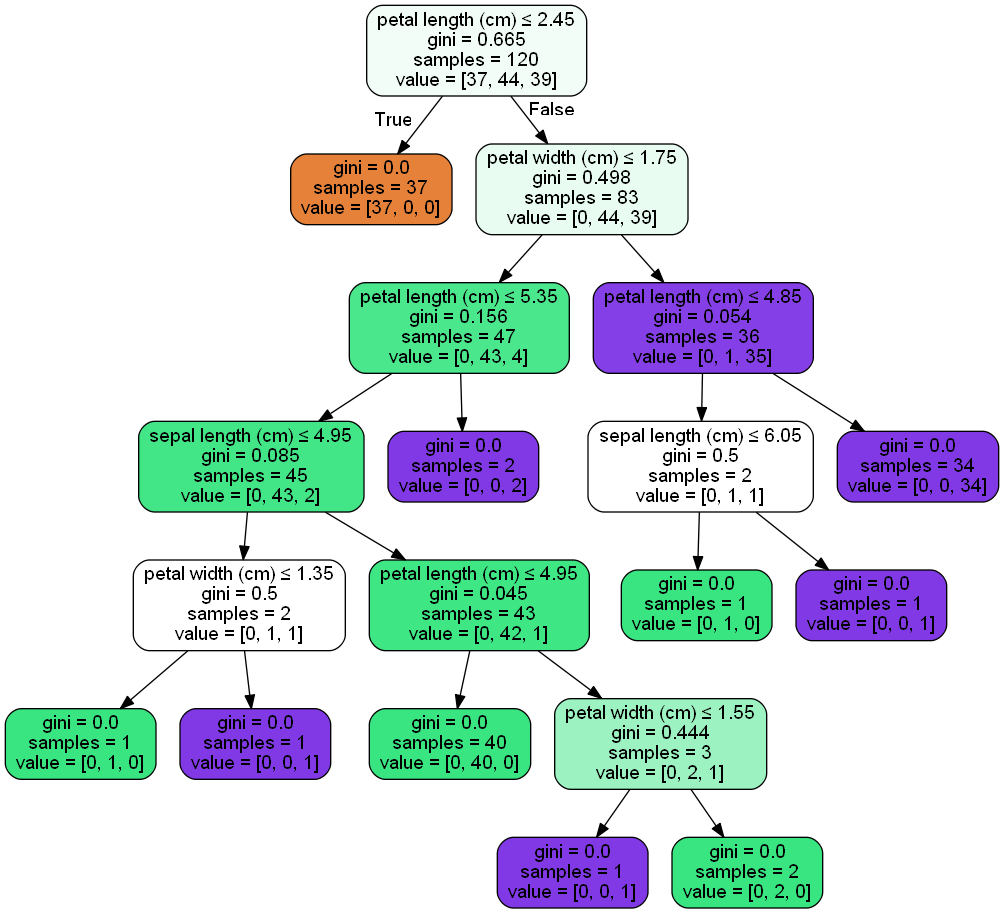

In [29]:
Image(filename='pkc.png')